In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import uproot

import histlite as hl

import scipy.interpolate as interp

from scipy.optimize import curve_fit


plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

/cvmfs/lz.opensciencegrid.org/external/Python/3.8.2/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
replayed_data_dir = '/global/cfs/cdirs/lux/users/haselsco/TUNL_August_2021_Data/replayed/slurm_run30225/'

rootfiles = [filename for filename in os.listdir(replayed_data_dir) \
                                         if filename.endswith('.root')]

In [3]:
data_list_gamma = []
data_list_ndet = []
data_list_coin = []
print('{} files found.'.format(len(rootfiles)))
for i,thisfile in enumerate(rootfiles):
    if i % 10 == 0:
        print('Opening {} of {}'.format(i,len(rootfiles)))
    
    fullpath = replayed_data_dir + thisfile
    
    data_list_gamma.append( uproot.open(fullpath)['gamma_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    data_list_ndet.append( uproot.open(fullpath)['ndet_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    data_list_coin.append( uproot.open(fullpath)['ndet_coin_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    

133 files found.
Opening 0 of 133
Opening 10 of 133
Opening 20 of 133
Opening 30 of 133
Opening 40 of 133
Opening 50 of 133
Opening 60 of 133
Opening 70 of 133
Opening 80 of 133
Opening 90 of 133
Opening 100 of 133
Opening 110 of 133
Opening 120 of 133
Opening 130 of 133


In [4]:
data = pd.concat(data_list_gamma,ignore_index=True)

data.head()

,gamma_ch,gamma_PH,gamma_E,gamma_ts,gamma_tof,gamma_PSD,gamma_flash,gamma_true_time,gamma_t10,gamma_t25,gamma_t50,gamma_t90
0,30.0,1429.566667,0.0,3.308887e+11,4487.659803,8.0,0.0,4487.659803,101.0,167.0,260.0,466.0
1,27.0,161.475000,0.0,3.308887e+11,4775.796949,8.0,0.0,4775.796949,75.0,91.0,124.0,338.0
2,27.0,22.516667,0.0,3.308887e+11,9014.655836,8.0,0.0,9014.655836,98.0,149.0,228.0,427.0
3,30.0,43.200000,0.0,3.308887e+11,8395.886976,8.0,0.0,8395.886976,103.0,110.0,127.0,377.0
4,27.0,86.433333,0.0,3.308887e+11,11192.588331,8.0,0.0,11192.588331,173.0,193.0,234.0,414.0


In [84]:
mask_pmt = data['gamma_ch'] == 27
mask_sipm = data['gamma_ch'] == 30

data_pmt = data.loc[mask_pmt]
data_sipm = data.loc[mask_sipm]

data_pmt.head()

escale_pmt = 0.6218
escale_sipm = 0.1868

data_pmt['Energy'] = escale_pmt * data_pmt['gamma_PH']
data_sipm['Energy'] = escale_sipm * data_sipm['gamma_PH']


<ipython-input-84-c8578e78cf60>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pmt['Energy'] = escale_pmt * data_pmt['gamma_PH']
<ipython-input-84-c8578e78cf60>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sipm['Energy'] = escale_sipm * data_sipm['gamma_PH']


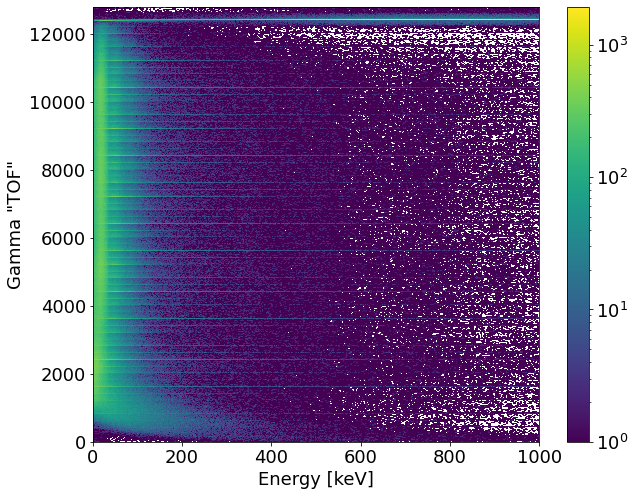

In [85]:
from matplotlib import colors

plt.hist2d( data_pmt['gamma_PH'] * escale_pmt,\
                 data_pmt['gamma_tof'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,12800,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()


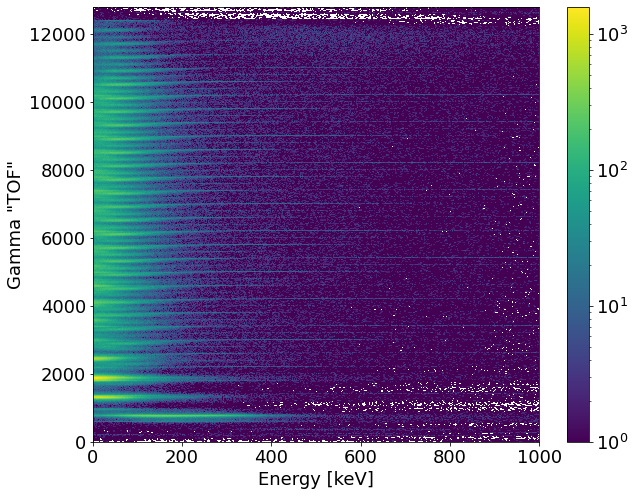

In [86]:
from matplotlib import colors

plt.hist2d( data_sipm['gamma_PH'] * escale_sipm,\
                 data_sipm['gamma_tof'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,12800,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()


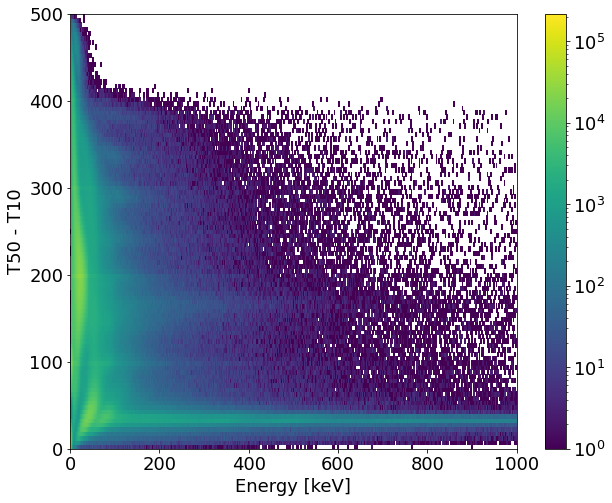

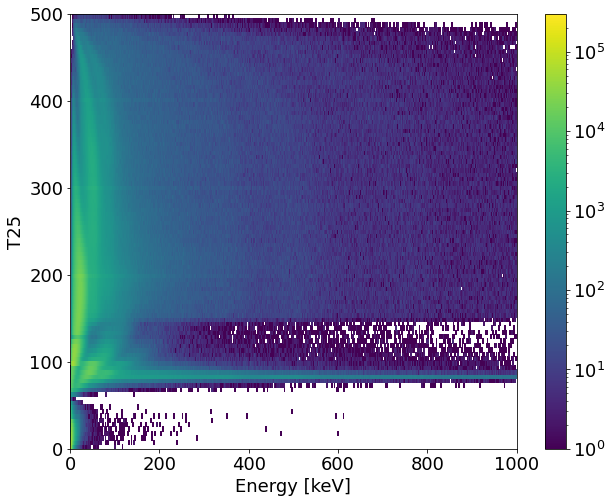

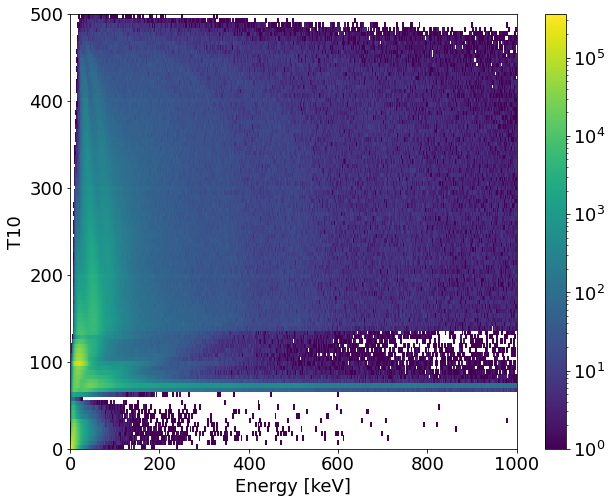

In [7]:
mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t50'].loc[mask] - data_pmt['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T50 - T10')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(2)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t25'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T25')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(3)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T10')
plt.xlim(0.,1000.)
plt.colorbar()


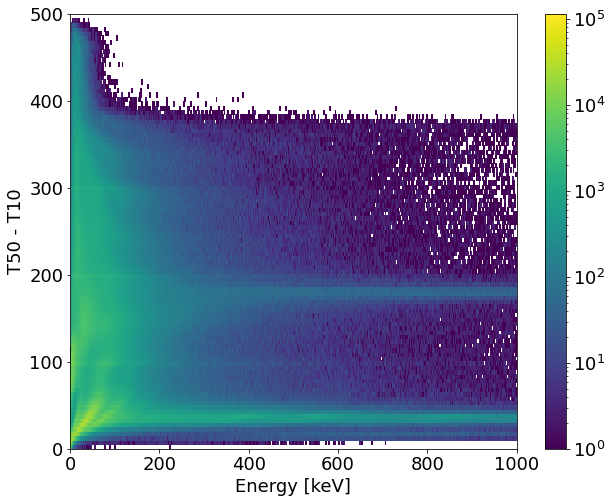

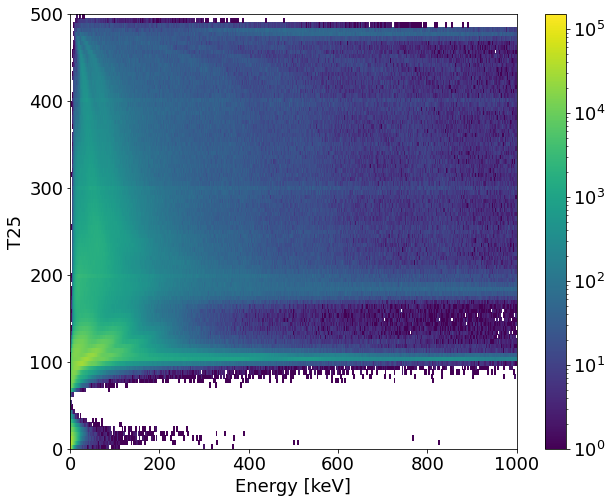

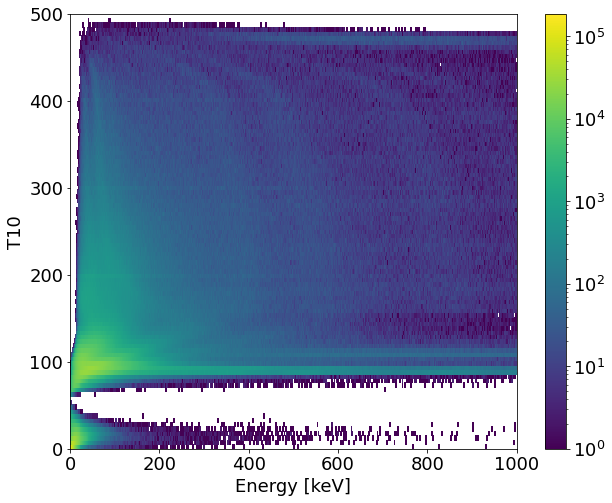

In [88]:
mask = (data_sipm['gamma_tof']>2000.)&(data_sipm['gamma_tof']<10000.)

plt.hist2d( data_sipm['gamma_PH'].loc[mask] * escale_sipm,\
                 data_sipm['gamma_t50'].loc[mask] - data_sipm['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T50 - T10')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(2)
plt.hist2d( data_sipm['gamma_PH'].loc[mask] * escale_sipm,\
                 data_sipm['gamma_t25'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T25')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(3)
plt.hist2d( data_sipm['gamma_PH'].loc[mask] * escale_sipm,\
                 data_sipm['gamma_t10'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T10')
plt.xlim(0.,1000.)
plt.colorbar()


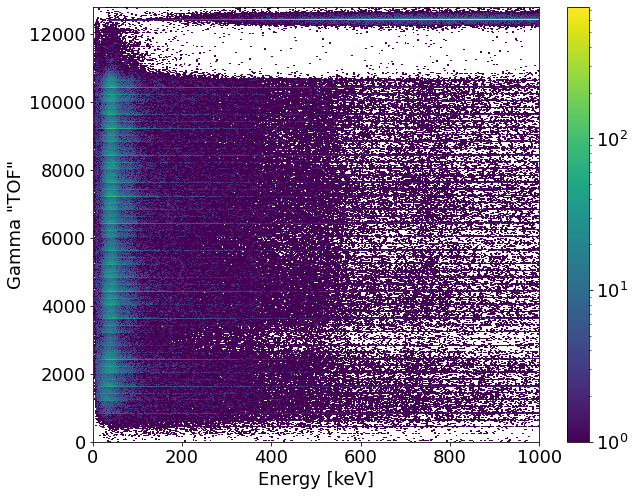

In [47]:
mask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * 0.6219,\
                 data_pmt['gamma_tof'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,12800,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()


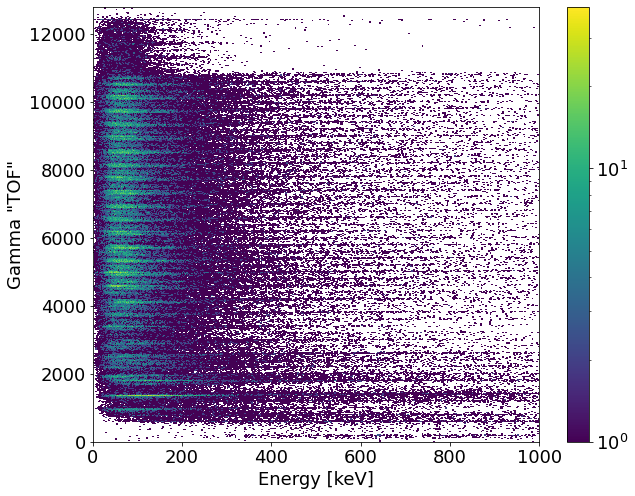

In [89]:
mask = (data_sipm['gamma_t25']>75.)&(data_sipm['gamma_t25']<100.)&\
        (data_sipm['gamma_t50'] - data_sipm['gamma_t10']>15)&\
        (data_sipm['gamma_t50'] - data_sipm['gamma_t10']<55)

plt.hist2d( data_sipm['gamma_PH'].loc[mask] * 0.6219,\
                 data_sipm['gamma_tof'].loc[mask], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,12800,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()


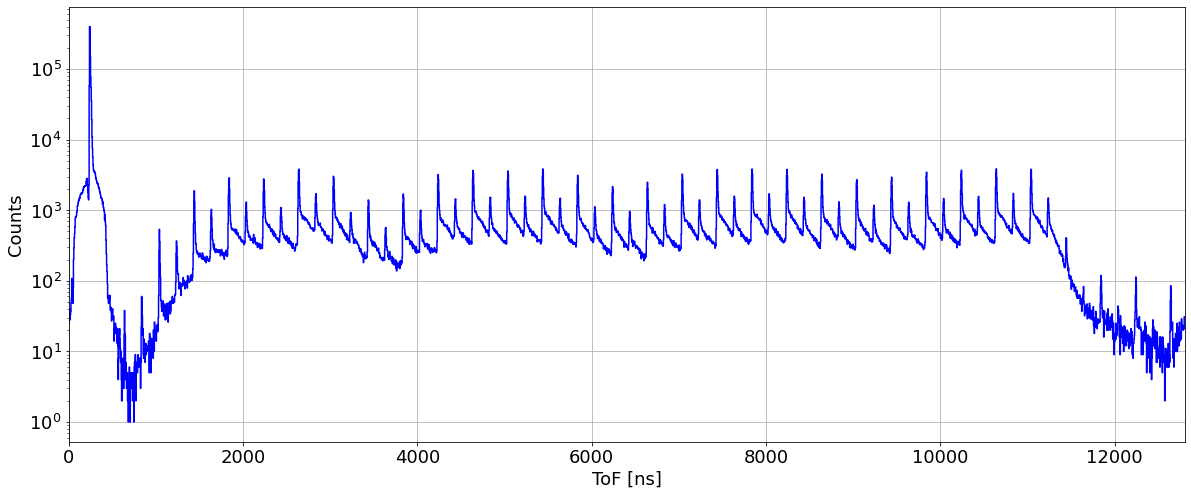

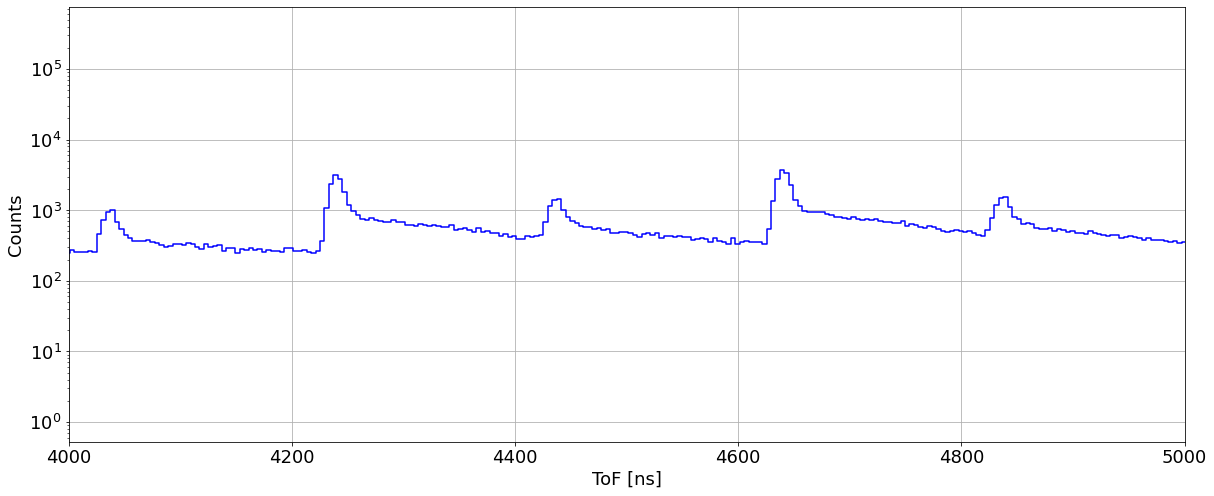

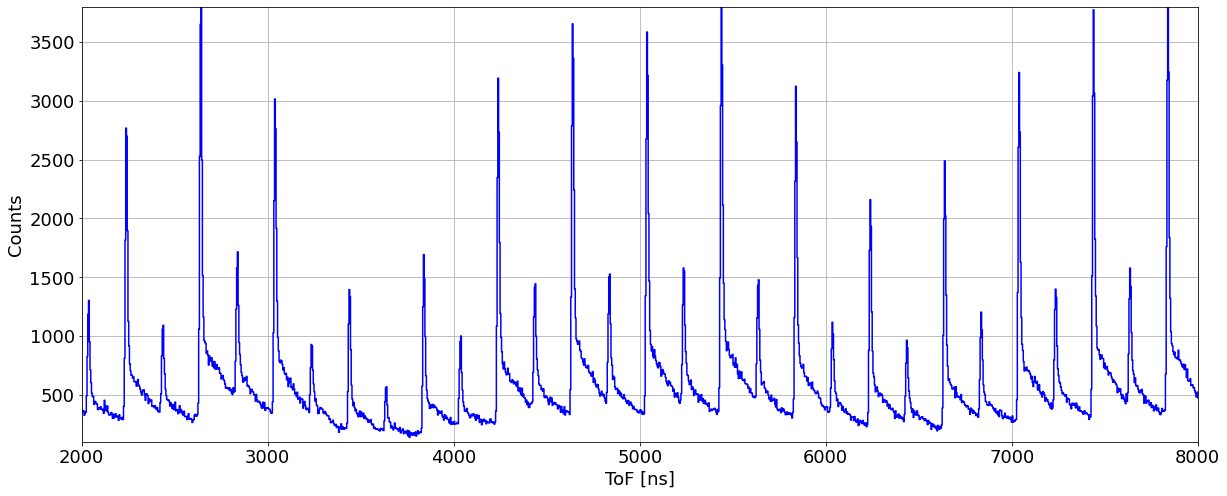

In [80]:
mask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)

TOFdata = np.fmod(data_pmt['gamma_tof'].loc[mask]+600,12800.)

plt.figure(1,figsize=(20,8))
h_pmt_tof = hl.hist( TOFdata, bins=np.linspace(0.,12800.,3200) )
hl.plot1d( h_pmt_tof, color='b' )
plt.yscale('log')
plt.xlim(0.,12800.)
#plt.ylim(4.,2e4)
plt.xlabel('ToF [ns]')
plt.ylabel('Counts')
plt.grid()

plt.figure(2,figsize=(20,8))
hl.plot1d( h_pmt_tof, color='b' )
plt.yscale('log')
plt.xlim(4000.,5000.)
plt.xlabel('ToF [ns]')
plt.ylabel('Counts')
plt.grid()

plt.figure(3,figsize=(20,8))
hl.plot1d( h_pmt_tof, color='b' )
plt.yscale('linear')
plt.xlim(2000.,8000.)
plt.ylim(100.,3800.)
plt.xlabel('ToF [ns]')
plt.ylabel('Counts')
plt.grid()

bincenters = (h_pmt_tof.bins[0][1:] + h_pmt_tof.bins[0][:-1])/2.
binvals = h_pmt_tof.values

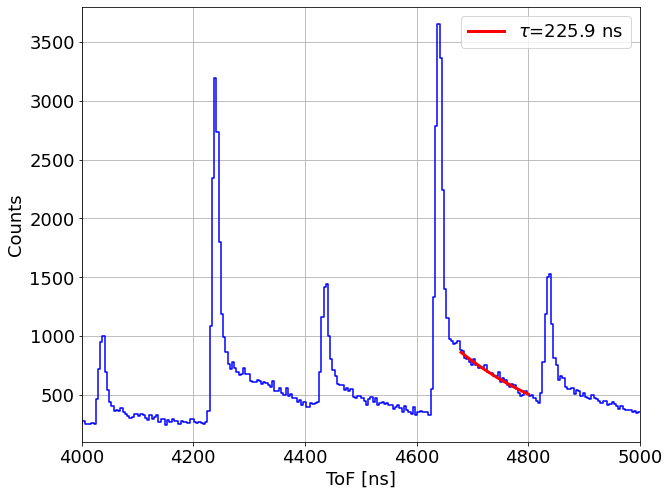

In [82]:
def Gaussian( x, A, mu, sig ):
    return A * np.exp(-(x-mu)**2/(2*sig**2))
def Expon( x, A, a, tau):
    return A * np.exp(-(x-a)/tau)

fitmin = 4680.
fitmax = 4800.

fitmask = (bincenters > fitmin) & (bincenters <fitmax)
p, cov = curve_fit( Expon, bincenters[fitmask], binvals[fitmask], p0=(500.,fitmin,100.))


hl.plot1d( h_pmt_tof, color='b' )

xfit = np.linspace(fitmin,fitmax,500)
#yfit = Expon( xfit, p[0], p[1], p[2])
plt.plot(xfit,Expon( xfit, *p),'-r', linewidth=3, label=r'$\tau$={:0.1f} ns'.format(p[2]))

plt.yscale('linear')
plt.xlim(4000.,5000.)
plt.ylim(100.,3800.)
plt.xlabel('ToF [ns]')
plt.ylabel('Counts')
plt.legend()
plt.grid()



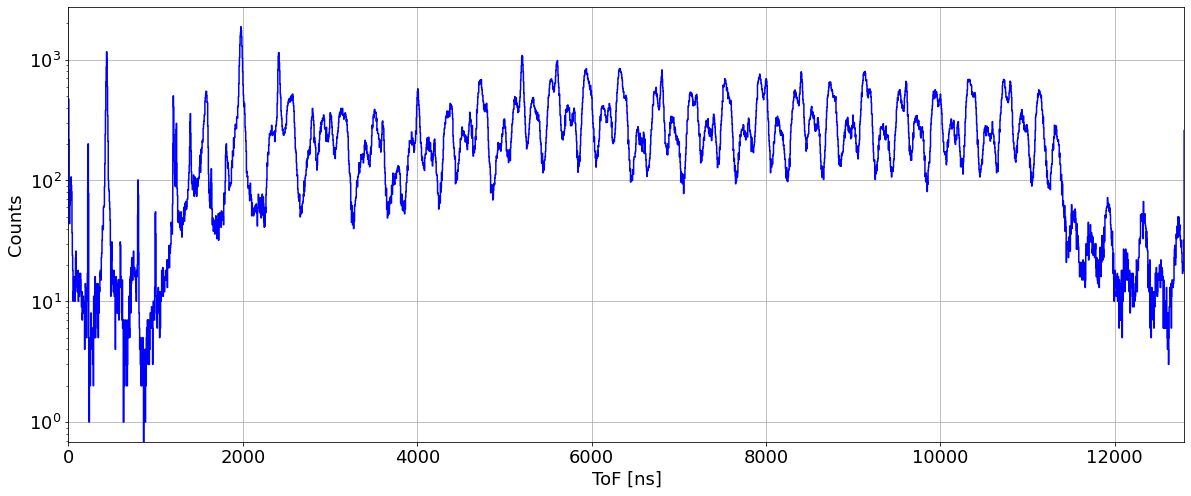

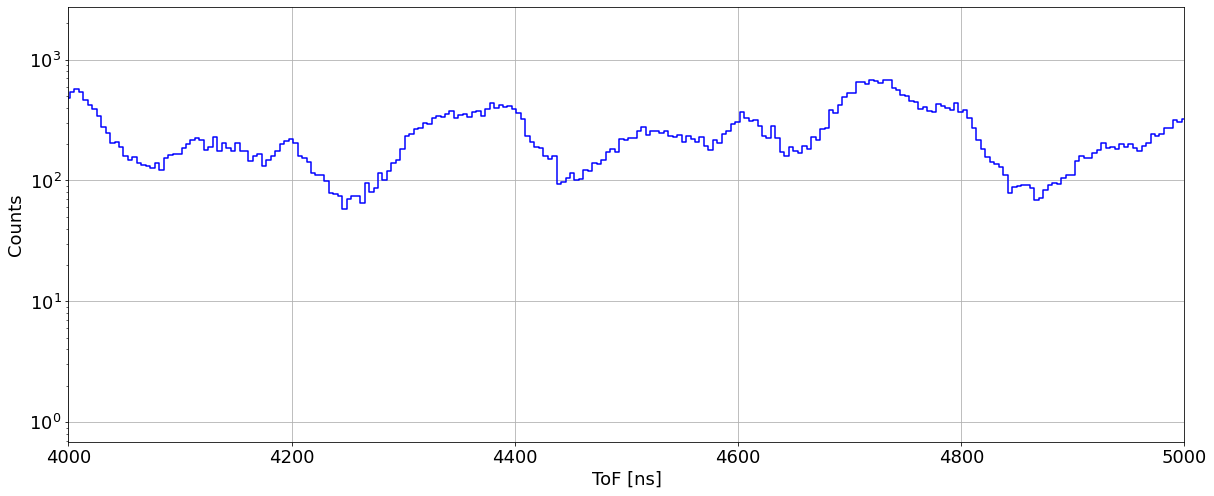

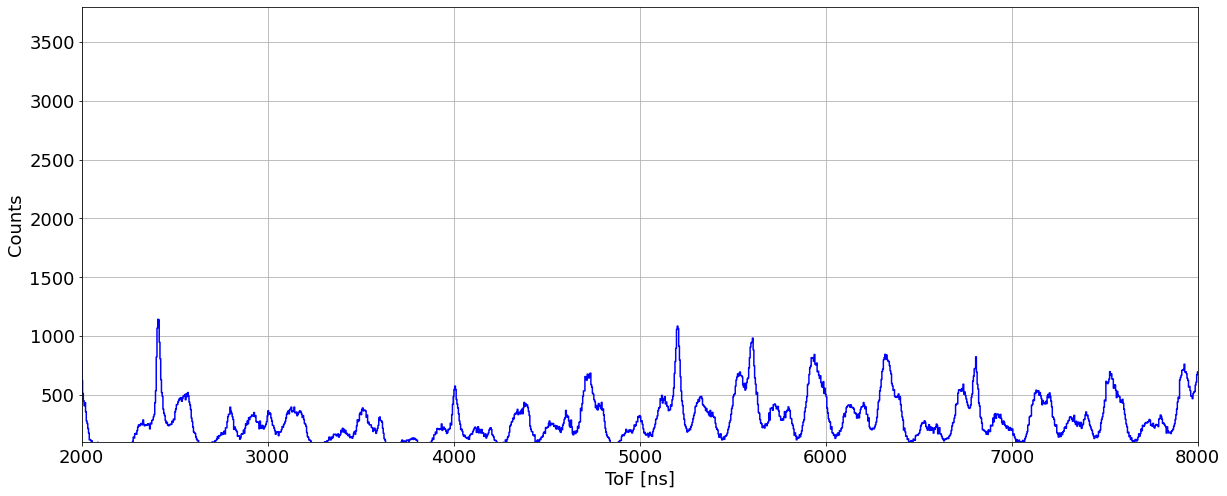

In [90]:
mask = (data_sipm['gamma_t25']>75.)&(data_sipm['gamma_t25']<100.)&\
        (data_sipm['gamma_t50'] - data_sipm['gamma_t10']>15)&\
        (data_sipm['gamma_t50'] - data_sipm['gamma_t10']<55)

TOFdata = np.fmod(data_sipm['gamma_tof'].loc[mask]+600,12800.)

plt.figure(1,figsize=(20,8))
h_sipm_tof = hl.hist( TOFdata, bins=np.linspace(0.,12800.,3200) )
hl.plot1d( h_sipm_tof, color='b' )
plt.yscale('log')
plt.xlim(0.,12800.)
#plt.ylim(4.,2e4)
plt.xlabel('ToF [ns]')
plt.ylabel('Counts')
plt.grid()

plt.figure(2,figsize=(20,8))
hl.plot1d( h_sipm_tof, color='b' )
plt.yscale('log')
plt.xlim(4000.,5000.)
plt.xlabel('ToF [ns]')
plt.ylabel('Counts')
plt.grid()

plt.figure(3,figsize=(20,8))
hl.plot1d( h_sipm_tof, color='b' )
plt.yscale('linear')
plt.xlim(2000.,8000.)
plt.ylim(100.,3800.)
plt.xlabel('ToF [ns]')
plt.ylabel('Counts')
plt.grid()

bincenters = (h_sipm_tof.bins[0][1:] + h_sipm_tof.bins[0][:-1])/2.
binvals = h_pmt_tof.values

In [ ]:
sipm_mask = (datadf['t50']-datadf['t10']<70.) & (datadf['t50']-datadf['t10']>10.)

In [10]:
import pickle

datalist = []

for i in range(10):
    filename = replayed_data_dir + 'run30225_{}nai_pmt_waveforms.pkl'.format(i)
    with open( filename ,'rb') as pklfile:
        datalist.extend(pickle.load(pklfile))
    
datadf = pd.DataFrame(datalist)



In [39]:
datadf.head()
#datadf.shape[0]

,rindex,timestamp,channelid,formatbits,peakhigh_index,peakhigh_reported,info,acc,maw,mawtest,puflag,nsamplewords,peakhigh_val,t10,t25,t50,t90,tof,samples
0,1009152,125244495,11,5,280,8.758333,0,"[16302.0, 24559.0, 32699.0, 8164.0, 8257.0, 16...","[205.0, 104.0, 71.0]",0,0,250,856,21,83,99,280,[4918.4781733542195],"[819.0, 826.0, 830.0, 821.0, 817.0, 813.0, 809..."
1,1009415,125245291,11,5,116,16.291667,16,"[16448.0, 24589.0, 32738.0, 8220.0, 8141.0, 16...","[197.0, 111.0, 72.0]",0,1,250,864,19,117,137,440,[7446.80343655641],"[819.0, 818.0, 817.0, 815.0, 817.0, 840.0, 833..."
2,1009678,125246034,11,5,495,174.258333,0,"[16515.0, 24755.0, 32940.0, 8240.0, 8240.0, 16...","[1127.0, 630.0, 556.0]",0,0,250,1062,235,272,474,495,[11849.471367576669],"[818.0, 818.0, 822.0, 821.0, 818.0, 819.0, 834..."
3,1009941,125246909,11,5,486,29.308333,16,"[16465.0, 24697.0, 32882.0, 8241.0, 8232.0, 16...","[302.0, 152.0, 128.0]",0,1,250,871,87,171,228,284,[2596.6485623502676],"[847.0, 837.0, 843.0, 816.0, 822.0, 816.0, 807..."
4,1010204,125247587,11,5,436,132.683333,0,"[16403.0, 24529.0, 32627.0, 8143.0, 8126.0, 16...","[170.0, 114.0, 63.0]",0,0,250,995,420,429,445,487,[5110.488992311949],"[821.0, 812.0, 808.0, 806.0, 814.0, 810.0, 811..."


In [40]:
tofarr = [ float(datadf['tof'].iloc[i]) for i in range(datadf.shape[0]) ]

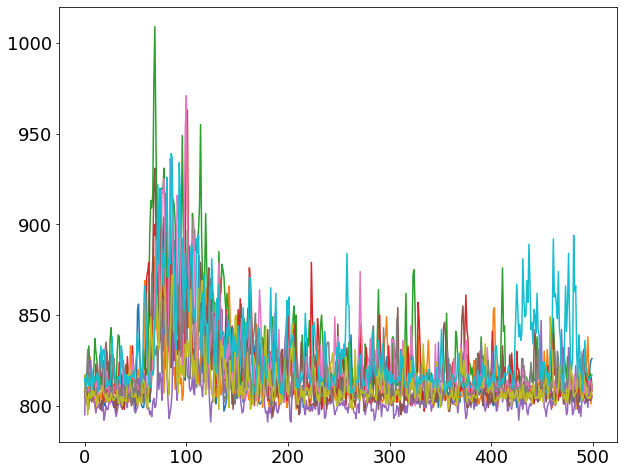

In [45]:
mask = (datadf['t25']>75.)&(datadf['t25']<100.)&\
        (datadf['t50'] - datadf['t10']>15)&\
        (datadf['t50'] - datadf['t10']<55)&\
        (datadf['peakhigh_reported']* 0.6219 < 100)&\
        (datadf['tof']>6000.) & (datadf['tof']<7000.)

dfmask = datadf.loc[mask]

for i in range(10):
    plt.plot(dfmask['samples'].iloc[i])


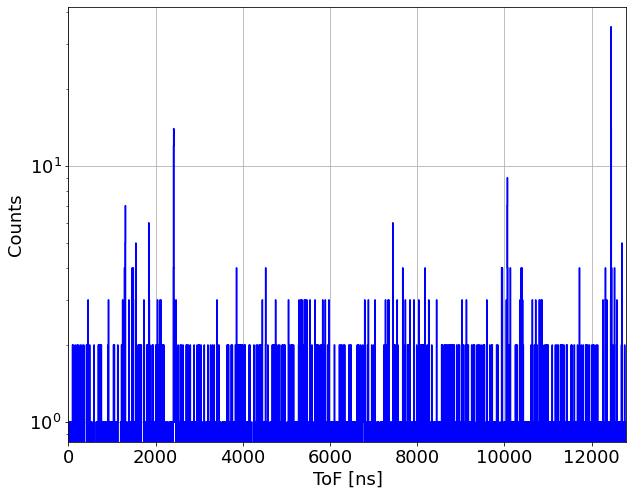

In [43]:
h_pkl_tof = hl.hist( tofarr, bins=np.linspace(0.,12800.,3200) )
hl.plot1d( h_pkl_tof, color='b' )
plt.yscale('log')

plt.xlim(0.,12800.)
#plt.ylim(4.,2e4)

plt.xlabel('ToF [ns]')
plt.ylabel('Counts')
plt.grid()